# Handling trajectory data files (reading & writing)

<img align="right" src="https://anitagraser.github.io/movingpandas/assets/img/movingpandas.png">

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/anitagraser/movingpandas/master?filepath=tutorials/2-reading-data-from-files.ipynb)

**<p style="color:#e31883">This notebook demonstrates the current development version of MovingPandas.</p>**

For tutorials using the latest release visit https://github.com/anitagraser/movingpandas-examples.


### You can either loging with **hf_login.sh** or login with down below code
make sure you have a token created in huggingface, also you should set the token with **write** access

In [1]:
from huggingface_hub import login, whoami
login()

### use the hf_tools python package for download or upload csv files

In [2]:
import numpy as np
import os
import hf_tools.scripts.add_path
from hf_tools.src.hf_tools.hf_sync import *

In [3]:
download_file(file_path='hf_tools/data/', 
                  repo_id="ARG-NCTU/uav-usv-traj", 
                  repo_type="dataset", 
                  hf_path='wamv_turning_radius_1.csv')
download_file(file_path='hf_tools/data/', 
                  repo_id="ARG-NCTU/uav-usv-traj", 
                  repo_type="dataset", 
                  hf_path='wamv_turning_radius_0.5.csv')
download_file(file_path='hf_tools/data/', 
                  repo_id="ARG-NCTU/uav-usv-traj", 
                  repo_type="dataset", 
                  hf_path='wamv_turning_radius_0.25.csv')

wamv_turning_radius_1.csv:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

wamv_turning_radius_0.5.csv:   0%|          | 0.00/9.62k [00:00<?, ?B/s]

wamv_turning_radius_0.25.csv:   0%|          | 0.00/9.54k [00:00<?, ?B/s]

## Reading CSVs

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data1 = pd.read_csv('hf_tools/data/wamv_turning_radius_1.csv')
data05 = pd.read_csv('hf_tools/data/wamv_turning_radius_0.5.csv')
data025 = pd.read_csv('hf_tools/data/wamv_turning_radius_0.25.csv')

## Plot 3 trajectories of 3 different angular velocity

WAMV will start turning after 10s of only linear velocity

In [7]:
def plot_trajectory(df, label, color):
    """
    Plot the trajectory of the WAMV
    input:  df - pandas dataframe with columns 'x', 'y'
            label - label for the plot
            color - color for the plot 
    """
    
    plt.plot(df['x'], df['y'], marker=',', label=label, color=color)
    plt.arrow(df['x'].iloc[-2], df['y'].iloc[-2], 
              df['x'].iloc[-1] - df['x'].iloc[-2], df['y'].iloc[-1] - df['y'].iloc[-2], 
              shape='full', lw=0, length_includes_head=True, head_width=0.35, head_length=0.6, color=color)


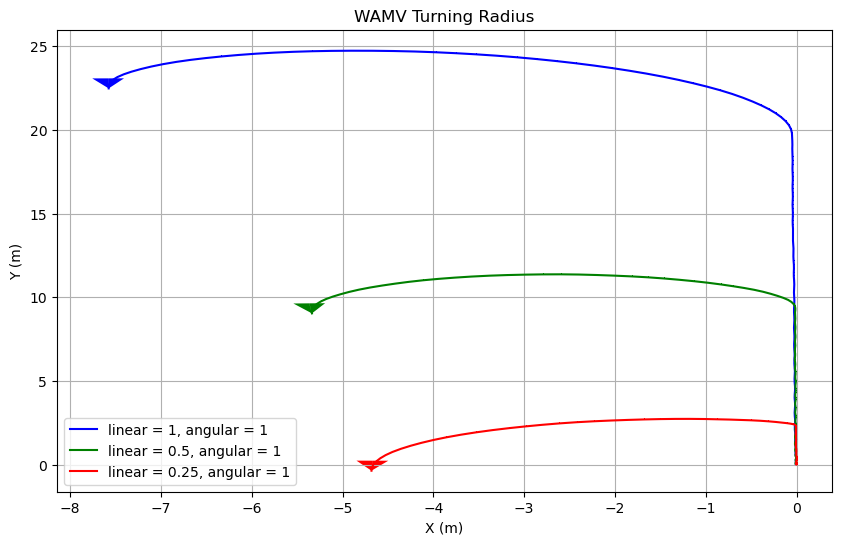

In [9]:
plt.figure(figsize=(10, 6))

plot_trajectory(data1, 'linear = 1, angular = 1', 'blue')
plot_trajectory(data05, 'linear = 0.5, angular = 1', 'green')
plot_trajectory(data025, 'linear = 0.25, angular = 1', 'red')

plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('WAMV Turning Radius')
plt.legend()
plt.grid(True)
plt.show()